In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
dafni_impacts_path = 'DAFNI-impacts.csv'
oidj_table_processed_path = 'OiDjTable.csv'

dafni_impacts_df = pd.read_csv(dafni_impacts_path)
oidj_table_processed_df = pd.read_csv(oidj_table_processed_path)

# Data Integration
oidj_table_processed_df.rename(columns={'zonei': 'zone'}, inplace=True)
dafni_impacts_enriched_df = pd.merge(dafni_impacts_df, oidj_table_processed_df, left_on='net_i', right_on='zone', how='left')
dafni_impacts_enriched_df.rename(columns={'Oi_all': 'Oi_net_i', 'Dj_all': 'Dj_net_i'}, inplace=True)
dafni_impacts_enriched_df.drop(['zone'], axis=1, inplace=True)

dafni_impacts_enriched_df = pd.merge(dafni_impacts_enriched_df, oidj_table_processed_df, left_on='net_j', right_on='zone', how='left')
dafni_impacts_enriched_df.rename(columns={'Oi_all': 'Oi_net_j', 'Dj_all': 'Dj_net_j'}, inplace=True)
dafni_impacts_enriched_df.drop(['zone'], axis=1, inplace=True)

# Feature Selection
features = dafni_impacts_enriched_df[['Oi_net_i', 'Dj_net_i', 'Oi_net_j', 'Dj_net_j', 'net_secs']].values
target = dafni_impacts_enriched_df['CkDiffRoad'].values

# Data Normalization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

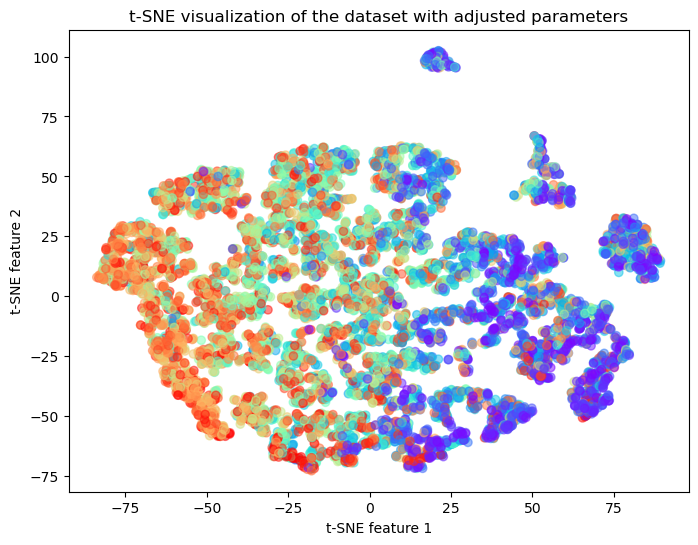

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, perplexity=50, learning_rate=100, n_iter=3000, random_state=42)
features_tsne = tsne.fit_transform(features_scaled)

# Generate a colour map based on an array of targets
unique_labels = np.unique(target)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
color_map = {label: color for label, color in zip(unique_labels, colors)}

# Assign colours to each data point
colors_for_points = [color_map[label] for label in target]

# Plot t-SNE scatterplot, with each category in a different colour
plt.figure(figsize=(8, 6))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], alpha=0.5, c=colors_for_points)
plt.title('t-SNE visualization of the dataset with adjusted parameters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()



